# Feedback zum Mobbing-Fragebogen

Dieses Notebook dient zur Auswertung des Feedbacks zum Mobbingfragebogen. Es verarbeitet die in der Datei `Feedback.csv` gespeicherten Antworten und generiert eine Analyse der Ergebnisse.

## Nutzung

Um das Notebook zu nutzen, laden Sie die `Feedback.csv`-Datei hoch und führen Sie oben alle Zellen aus. Es wird eine PDF-Datei sowie eine interaktive HTML-Datei mit den Ergebnissen erstellt, die Sie herunterladen können.


In [26]:
# Download required packages

!pip install pandas matplotlib seaborn numpy scipy scikit-learn plotly pdfkit jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 970.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.8/430.8 kB 3.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
# Import Feedback.csv and print the first few rows

import pandas as pd

df = pd.read_csv('Feedback.csv')
print(df.head())

   Wie würdest du die Umsetzung des Fragebogens bewerten?  \
0                                                5.0        
1                                                5.0        
2                                                5.0        
3                                                NaN        
4                                                NaN        

   Die angegebene Zeit (10 bis 20 Min.) war realistisch und hat für mich gepasst.  \
0                                                4.0                                
1                                                5.0                                
2                                                5.0                                
3                                                NaN                                
4                                                NaN                                

   Die Fragen waren klar und verständlich formuliert.  \
0                                                5.0    
1       

In [17]:
survey = [    
    {
      "short_id": "implementation_rating",
      "long_question": "Wie würdest du die Umsetzung des Fragebogens bewerten?",
      "type": "rating",
    },
    {
      "short_id": "time_realistic",
      "long_question": "Die angegebene Zeit (10 bis 20 Min.) war realistisch und hat für mich gepasst.",
      "type": "likert",
    },
    {
      "short_id": "clarity_questions",
      "long_question": "Die Fragen waren klar und verständlich formuliert.",
      "type": "likert",
    },
    {
      "short_id": "anonymity_feeling",
      "long_question": "Ich habe mich beim Beantworten sicher und anonym gefühlt.",
      "type": "likert",
    },
    {
      "short_id": "belief_in_improvement",
      "long_question": "Ich glaube, dass die Ergebnisse dieser Umfrage etwas an unserer Schule verbessern werden.",
      "type": "likert",
    },
    {
      "short_id": "technical_feedback",
      "long_question": "Offenes Feedback zum Fragebogen",
      "type": "textarea",
    }
  ]


In [21]:
# Rename questions to short_id in the dataframe

question_map = {q["long_question"]: q["short_id"] for q in survey}
df.rename(columns=question_map, inplace=True)

print(df.head())

   implementation_rating  time_realistic  clarity_questions  \
0                    5.0             4.0                5.0   
1                    5.0             5.0                5.0   
2                    5.0             5.0                5.0   
3                    NaN             NaN                NaN   
4                    NaN             NaN                NaN   

   anonymity_feeling  belief_in_improvement technical_feedback  
0                3.0                    2.0                NaN  
1                5.0                    3.0                NaN  
2                5.0                    1.0                NaN  
3                NaN                    NaN                NaN  
4                NaN                    NaN                NaN  


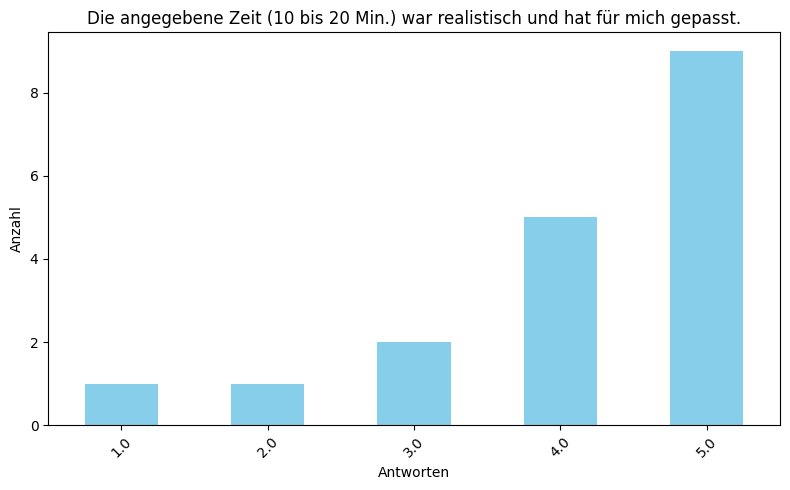

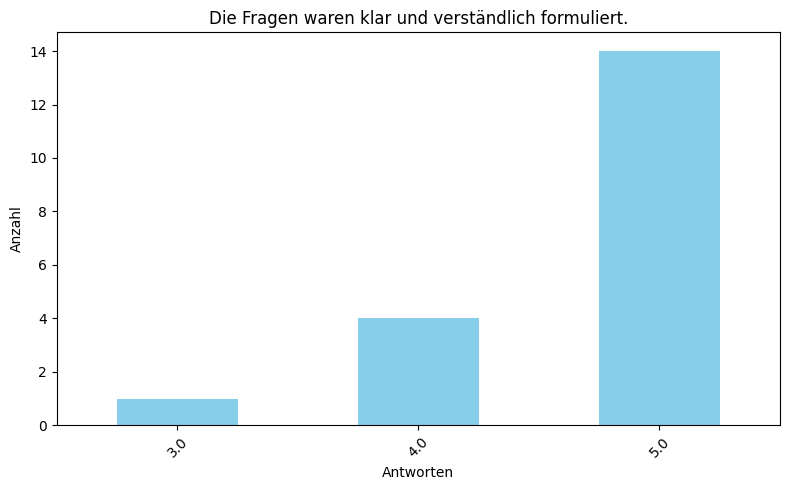

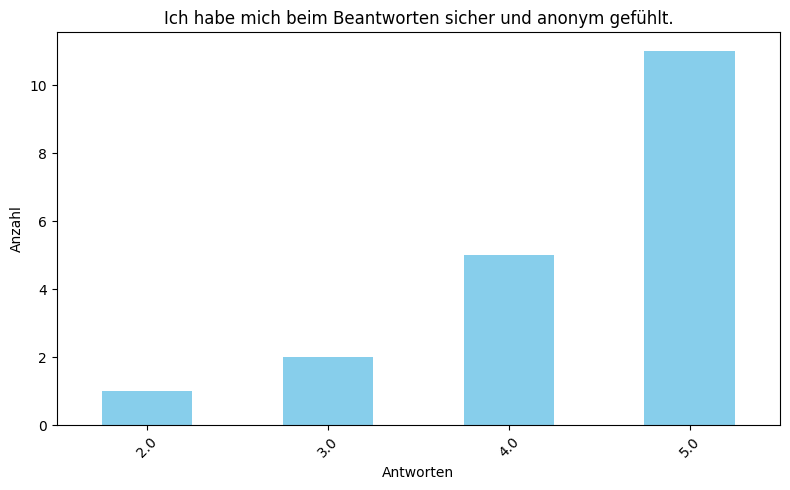

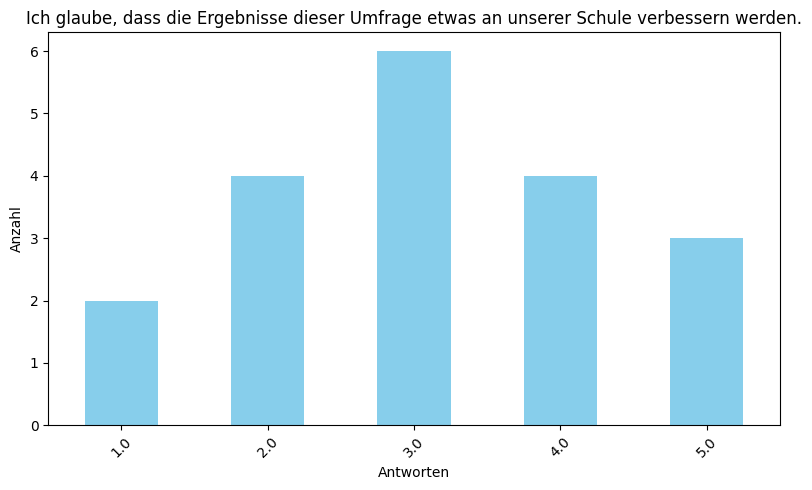

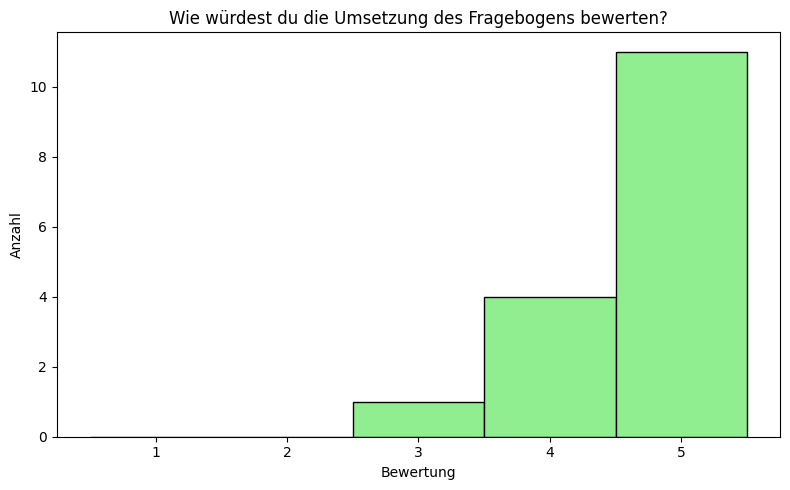

Feedback für Frage: Offenes Feedback zum Fragebogen
- Easy zum Verstehen 
- ich fand schön das man sich anonym äußern konnte 
- ich fande es sehr gut, die Fragen wurden verständnisvoll gefragt, und das Layout war sehr schön
- Nicht alles mit Zahlen bewerten.
- Die Lehrer/die Schulleitung/... sollten den Bogen wirklich ernst nehmen und nicht die Sache mit "Darum kümmern wir uns irgend wann einmal...", abheften.

Vielen Dank, für´s Durchlesen!




In [22]:
import matplotlib.pyplot as plt


# Create diagrams for each likert question
for question in survey:
    if question["type"] == "likert":
        # Generate a bar chart for the likert question
        
        data = df[question["short_id"]].value_counts().sort_index()
        plt.figure(figsize=(8, 5))
        data.plot(kind='bar', color='skyblue')
        plt.title(question["long_question"])
        plt.xlabel('Antworten')
        plt.ylabel('Anzahl')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Create a histogram for the rating question
for question in survey:
    if question["type"] == "rating":
        data = df[question["short_id"]]
        plt.figure(figsize=(8, 5))
        plt.hist(data, bins=range(1, 7), color='lightgreen', edgecolor='black', align='left')
        plt.title(question["long_question"])
        plt.xlabel('Bewertung')
        plt.ylabel('Anzahl')
        plt.xticks(range(1, 6))
        plt.tight_layout()
        plt.show()

# Print all text feedback
for question in survey:
    if question["type"] == "textarea":
        print(f"Feedback für Frage: {question['long_question']}")
        feedbacks = df[question["short_id"]].dropna()
        for feedback in feedbacks:
            print(f"- {feedback}")
        print("\n")



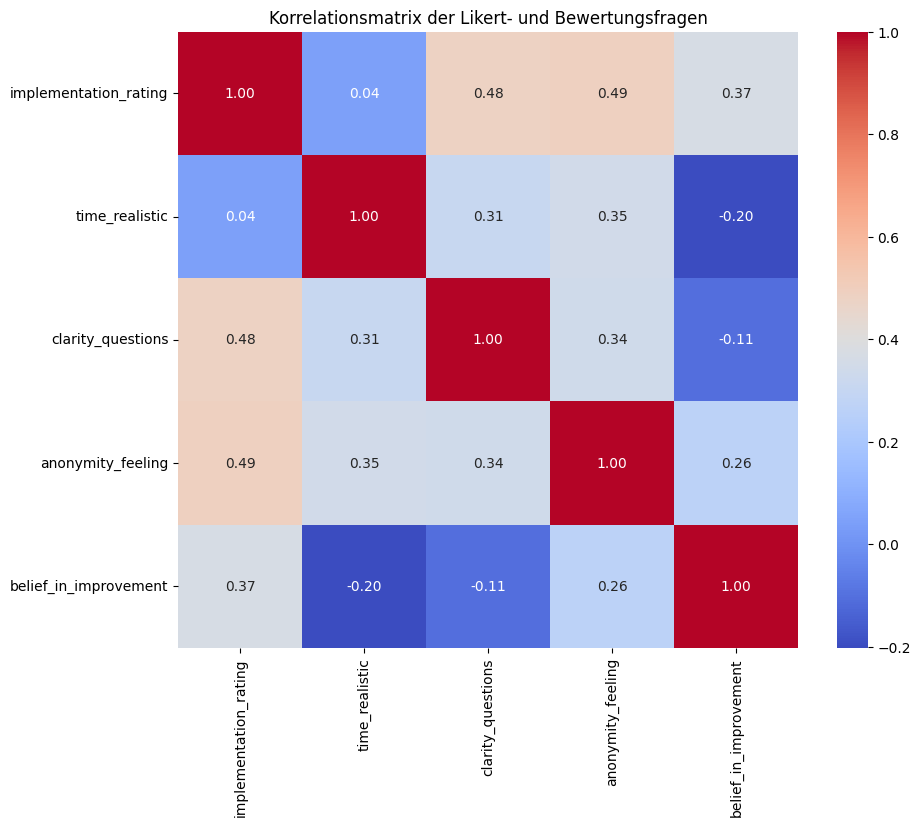

In [27]:
# Add correlation and visualize correlation matrix for likert and rating questions
import seaborn as sns
likert_rating_cols = [q["short_id"] for q in survey if q["type"] in ["likert", "rating"]]
corr = df[likert_rating_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der Likert- und Bewertungsfragen')
plt.show()